## Construção de diagramas de equilíbrio no Python
### Diagrama $P-x-y$



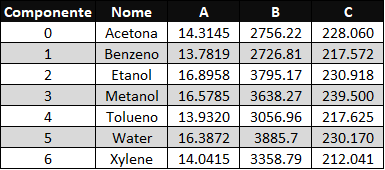

In [41]:
# Carregando os pacotes do Python
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# Importando as bibliotecas do CoolProp
import CoolProp as Cp
from CoolProp.CoolProp import PropsSI

In [42]:
component_list = ['Acetone','Benzene','Ethanol','Methanol','Toluene','Water','o-Xylene']

In [43]:
# Parâmetros da equação de Antoine
M = np.array([[14.3145,2756.22,228.060],
[13.7819,2726.81,217.572],
[16.8958,3795.17,230.918],
[16.5785,3638.27,239.500],
[13.9320,3056.96,217.625],
[16.3872,3885.7,230.170],
[14.0415,3358.79,212.041]])

## Através do modelo ideal (lei de Raoult)

In [44]:
# Construção do diagrama P-x-y
# Definição dos componentes

comp1 = 1
comp2 = 2
print(f"{component_list[1]} - {component_list[2]}")

Benzene - Ethanol


In [45]:
# Alocando vetores
Te = 50 # °C
Tek = Te + 273.15 # Conversão para K
z1 = np.linspace(0.,1.,101)
y1o = np.zeros_like(z1)
x1b = np.zeros_like(z1)
Pbid = np.zeros_like(z1)
Poid = np.zeros_like(z1)
Pb = np.zeros_like(z1)
Po = np.zeros_like(z1)

## Cálculos através da lei de Raoult

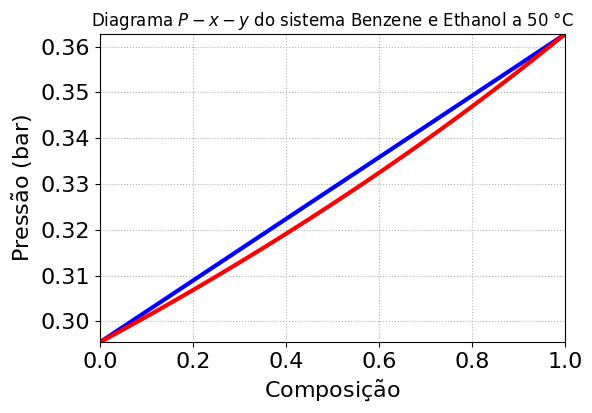

In [49]:
P1sat = np.exp(M[comp1, 0] - M[comp1, 1] / (Te + M[comp1, 2]))
P2sat = np.exp(M[comp2, 0] - M[comp2, 1] / (Te + M[comp2, 2]))
# Laço para o cálculo em cada ponto

for i in range(len(z1)):
    # Problema do ponto de bolha
    x1 = z1[i]
    Pbid[i] = (x1*P1sat + (1-x1)*P2sat) / 100
    x1b[i] = x1
    
    # Problema do ponto de orvalho

    y1 = z1[i]
    Poid[i] = (1/(y1/P1sat + (1-y1)/P2sat))/100
    y1o[i] = y1

plt.figure(num=None,figsize=(6,4),facecolor='w',edgecolor='k')
plt.plot(x1b,Pbid,color='blue',linewidth=3.)
plt.plot(y1o,Poid,color='red',linewidth=3.)
# Outras opções
plt.title(f"Diagrama $P-x-y$ do sistema {component_list[comp1]} e {component_list[comp2]} a {Te} °C")
plt.grid(linestyle=':')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Composic$\mathrm{\c}$$\mathrm{\~a}$o',fontsize=16)
plt.ylabel('Press$\mathrm{\~a}$o (bar)',fontsize=16)
plt.axis([0,1,np.min(Poid),np.max(Pbid)])
plt.show()

## Solução com o CoolProp

/tmp/ipykernel_6110/151047621.py:17: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  plt.axis([0,1,np.min(Po),np.max(Pb)])


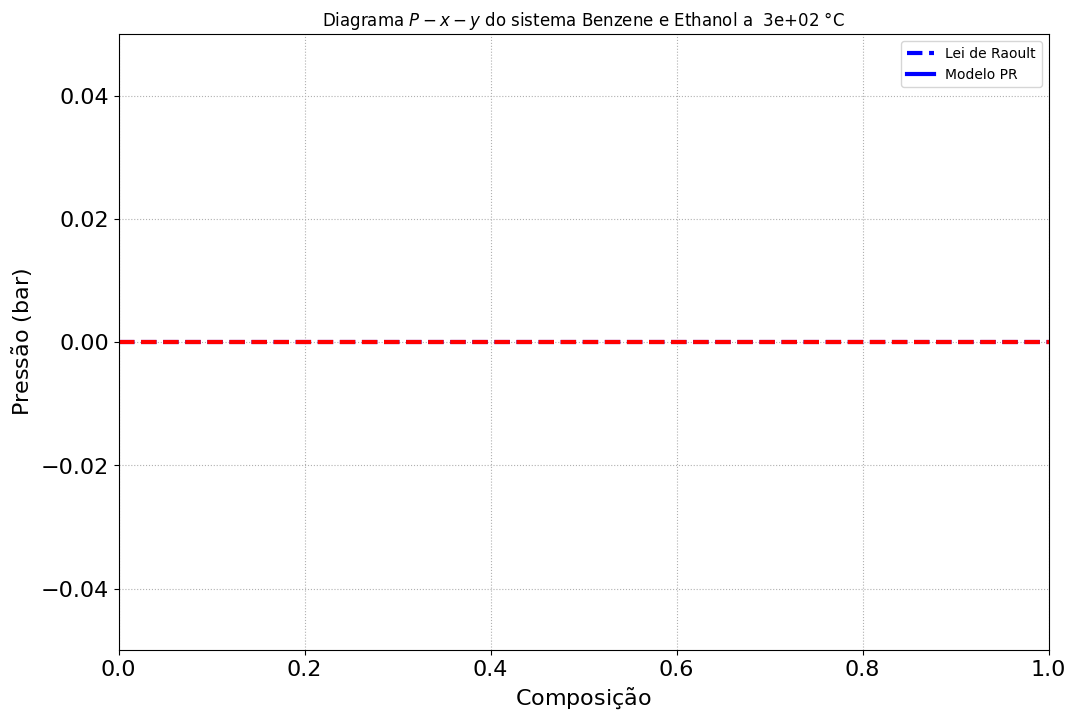

In [50]:
# Código para a solução usando o CoolProp
# Criando objetos misturas

plt.figure(num=None,figsize=(12,8),facecolor='w',edgecolor='k')
plt.plot(z1,Pb,color='blue',linewidth=3.,linestyle = '--')
plt.plot(x1b,Pbid,color='blue',linewidth=3.)
plt.plot(y1o,Poid,color='red',linewidth=3.)
plt.plot(z1,Po,color='red',linewidth=3.,linestyle = '--')
# Outras opções
plt.title(f"Diagrama $P-x-y$ do sistema {component_list[comp1]} e {component_list[comp2]} a {Tek: 0.0} °C")
plt.legend(["Lei de Raoult","Modelo PR"])
plt.grid(linestyle=':')
plt.yticks(fontsize = 16)
plt.xticks(fontsize = 16)
plt.xlabel('Composic$\mathrm{\c}$$\mathrm{\~a}$o',fontsize=16)
plt.ylabel('Press$\mathrm{\~a}$o (bar)',fontsize=16)
plt.axis([0,1,np.min(Po),np.max(Pb)])
plt.show()